In [1]:
## Objective: Comparing the results of different pt2pl and pt2pt registrations
##                 to the labels

## NOTE: Requires preparations steps of manually 
    ## combining results and labels csvs, 
    ## aligning the weld detections with labels, 
    ## filling out the missing tags

## WeldTag | typeCheck | deltaMean_x,y,z,theta | euclidean dist
## for each of 
#         mid, median, mean, fgr, ransac, 
#         mid_pt2pt, median_pt2pt, mean_pt2pt, fgr_pt2pt, ransac_pt2pt, 
#         mid_pt2pl, median_pt2pl, mean_pt2pl, fgr_pt2pl, ransac_pt2pl, 

## for each delta, get the mean and variance 

## NEXT:
## DIagnose and fix the non detections
## Run the script with the parametric template
## Back to testing the iCP library

## Headers of the results file
    ## label_x | label_y | label_type | tag | id | type | 
    ## mean_x | mean_y | mean_z | mean_theta | 
    ## median_x | median_y | median_z | median_theta | 
    ## mid_x | mid_y | mid_z | mid_theta | 
    ## RANSAC_fitness | RANSAC_RMSE | RANSAC_x | RANSAC_y | RANSAC_z | RANSAC_theta | 
    ## FGR_fitness | FGR_RMSE | FGR_x | FGR_y | FGR_z | FGR_theta | 
    ## p2p_fitness_mean | p2p_rsme_mean | p2p_x_mean | p2p_y_mean | p2p_z_mean | p2p_theta_mean | 
    ## p2p_fitness_median | p2p_rsme_median | p2p_x_median | p2p_y_median | p2p_z_median | p2p_theta_median | 
    ## p2p_fitness_mid | p2p_rsme_mid | p2p_x_mid | p2p_y_mid | p2p_z_mid | p2p_theta_mid | 
    ## p2p_fitness_RANSAC | p2p_rsme_RANSAC | p2p_x_RANSAC | p2p_y_RANSAC | p2p_z_RANSAC | p2p_theta_RANSAC | 
    ## p2p_fitness_FGR | p2p_rsme_FGR | p2p_x_FGR | p2p_y_FGR | p2p_z_FGR | p2p_theta_FGR | 
    ## p2pl_fitness_mean | p2pl_rsme_mean | p2pl_x_mean | p2pl_y_mean | p2pl_z_mean | p2pl_theta_mean | 
    ## p2pl_fitness_median | p2pl_rsme_median | p2pl_x_median | p2pl_y_median | p2pl_z_median | p2pl_theta_median | 
    ## p2pl_fitness_mid | p2pl_rsme_mid | p2pl_x_mid | p2pl_y_mid | p2pl_z_mid | p2pl_theta_mid | 
    ## p2pl_fitness_RANSAC | p2pl_rsme_RANSAC | p2pl_x_RANSAC | p2pl_y_RANSAC | p2pl_z_RANSAC | p2pl_theta_RANSAC | 
    ## p2pl_fitness_FGR | p2pl_rsme_FGR | p2pl_x_FGR | p2pl_y_FGR | p2pl_z_FGR | p2pl_theta_FGR
    



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("./function_check/results and label (on the test_txt input).csv")

In [13]:
## Delete the "unnamed" columns
drop_cols = []
for col in data.columns:
    if col.lower().startswith("unnamed"):
        drop_cols.append(col)
print("drop_cols")
print(drop_cols)
print()
data = data.drop(drop_cols, axis=1)
print("remaining columns")
print(data.columns)

drop_cols
['Unnamed: 3', 'Unnamed: 7', 'Unnamed: 12', 'Unnamed: 17', 'Unnamed: 22', 'Unnamed: 29', 'Unnamed: 36', 'Unnamed: 43', 'Unnamed: 50', 'Unnamed: 57', 'Unnamed: 64', 'Unnamed: 71', 'Unnamed: 78', 'Unnamed: 85', 'Unnamed: 92', 'Unnamed: 99']

remaining columns
Index(['label_x', 'label_y', 'label_type', 'tag', 'id', 'type', 'mean_x',
       'mean_y', 'mean_z', 'mean_theta', 'median_x', 'median_y', 'median_z',
       'median_theta', 'mid_x', 'mid_y', 'mid_z', 'mid_theta',
       'RANSAC_fitness', 'RANSAC_RMSE', 'RANSAC_x', 'RANSAC_y', 'RANSAC_z',
       'RANSAC_theta', 'FGR_fitness', 'FGR_RMSE', 'FGR_x', 'FGR_y', 'FGR_z',
       'FGR_theta', 'p2p_fitness_mean', 'p2p_rsme_mean', 'p2p_x_mean',
       'p2p_y_mean', 'p2p_z_mean', 'p2p_theta_mean', 'p2p_fitness_median',
       'p2p_rsme_median', 'p2p_x_median', 'p2p_y_median', 'p2p_z_median',
       'p2p_theta_median', 'p2p_fitness_mid', 'p2p_rsme_mid', 'p2p_x_mid',
       'p2p_y_mid', 'p2p_z_mid', 'p2p_theta_mid', 'p2p_fitness_RANSAC'

In [14]:
## Remove the empty rows
empty_rows = []
for line, content in data.iterrows():
    if pd.isna(content["label_x"]):
        empty_rows.append(line)
data = data.drop(empty_rows, axis=0)

# ## Same thing
# data = data.dropna(axis=0, how='all')

## View Data
# data

,label_x,label_y,label_type,tag,id,type,mean_x,mean_y,mean_z,mean_theta,...,p2pl_x_RANSAC,p2pl_y_RANSAC,p2pl_z_RANSAC,p2pl_theta_RANSAC,p2pl_fitness_FGR,p2pl_rsme_FGR,p2pl_x_FGR,p2pl_y_FGR,p2pl_z_FGR,p2pl_theta_FGR
0,-80.31,-1.13,[,A_weld1,1.0,[,-80.753860,-0.689593,0.0,0.0,...,-81.900494,0.150644,0.0,2.993162,0.081818,0.056346,-80.066156,-0.845206,0.0,0.248349
1,12.09,-0.33,[,A_weld2,2.0,[,11.577708,-0.546947,0.0,0.0,...,12.005517,-0.897012,0.0,0.012195,0.047727,0.056256,11.915528,2.020316,0.0,0.044048
2,23.29,-0.33,[,A_weld3,3.0,[,22.948098,-0.531033,0.0,0.0,...,22.181318,0.427298,0.0,0.082426,0.066667,0.055042,23.565438,1.781642,0.0,0.054792
3,64.42,0.31,],A_weld4,4.0,],65.291501,-0.580597,0.0,0.0,...,64.414659,1.900252,0.0,0.028006,0.057576,0.053904,66.299947,0.539079,0.0,0.192369
4,76.42,0.91,],A_weld5,5.0,],76.852142,1.711934,0.0,0.0,...,76.408081,1.813977,0.0,0.065709,0.078788,0.052546,76.499947,1.280819,0.0,0.002300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,11.30,-1.12,[,DQ_weld2,2.0,[,10.640272,-2.774941,0.0,0.0,...,11.124145,0.841766,0.0,0.048821,0.042424,0.052739,9.186116,0.270314,0.0,3.118286
698,21.90,-0.12,[,DQ_weld3,3.0,[,21.574505,-0.210286,0.0,0.0,...,21.600908,0.372387,0.0,0.125327,0.065909,0.052845,21.900563,0.114460,0.0,0.001037
699,64.02,0.51,],DQ_weld4,4.0,],64.528453,0.037500,0.0,0.0,...,65.098794,0.614145,0.0,0.202804,0.033333,0.055703,65.713431,4.405166,0.0,2.903448
700,76.02,-0.29,],DQ_weld5,5.0,],76.566971,-0.113980,0.0,0.0,...,76.390003,0.257630,0.0,0.013283,0.050000,0.055453,75.082676,-1.366047,0.0,3.082301


In [19]:
## Identify the missing tags
missing_tags_idx = []
missing_tags = []
for line, content in data.iterrows():
    if pd.isna(content["id"]):
        missing_tags_idx.append(line)
        missing_tags.append(content["tag"])
print(f"missing_tags({len(missing_tags)})")
print(missing_tags)
# print(missing_tags_idx)

## dropping the missing tag cols for subseq analysis
data = data.drop(missing_tags_idx, axis=0)
print(f"dropping {len(missing_tags_idx)} missing tag rows")

## View Data
# data

missing_tags(54)
['D_weld3', 'L_weld1', 'L_weld2', 'M_weld3', 'M_weld4', 'U_weld3', 'U_weld4', 'AB_weld5', 'AB_weld6', 'AC_weld2', 'AC_weld3', 'AD_weld3', 'AD_weld4', 'AK_weld1', 'AK_weld2', 'AN_weld5', 'AN_weld6', 'BB_weld3', 'BB_weld4', 'BH_weld1', 'BH_weld2', 'BI_weld3', 'BI_weld4', 'BK_weld2', 'BN_weld5', 'BN_weld6', 'CA_weld4', 'CA_weld5', 'CA_weld6', 'CB_weld2', 'CG_weld3', 'CG_weld4', 'CX_weld5', 'CX_weld6', 'CZ_weld3', 'CZ_weld4', 'DB_weld3', 'DB_weld4', 'DE_weld4', 'DE_weld5', 'DE_weld6', 'DF_weld3', 'DF_weld4', 'DJ_weld3', 'DJ_weld4', 'DK_weld3', 'DK_weld4', 'DL_weld4', 'DL_weld5', 'DL_weld6', 'DM_weld3', 'DM_weld4', 'DP_weld3', 'DP_weld4']
dropping 54 missing tag rows


,label_x,label_y,label_type,tag,id,type,mean_x,mean_y,mean_z,mean_theta,...,p2pl_x_RANSAC,p2pl_y_RANSAC,p2pl_z_RANSAC,p2pl_theta_RANSAC,p2pl_fitness_FGR,p2pl_rsme_FGR,p2pl_x_FGR,p2pl_y_FGR,p2pl_z_FGR,p2pl_theta_FGR
0,-80.31,-1.13,[,A_weld1,1.0,[,-80.753860,-0.689593,0.0,0.0,...,-81.900494,0.150644,0.0,2.993162,0.081818,0.056346,-80.066156,-0.845206,0.0,0.248349
1,12.09,-0.33,[,A_weld2,2.0,[,11.577708,-0.546947,0.0,0.0,...,12.005517,-0.897012,0.0,0.012195,0.047727,0.056256,11.915528,2.020316,0.0,0.044048
2,23.29,-0.33,[,A_weld3,3.0,[,22.948098,-0.531033,0.0,0.0,...,22.181318,0.427298,0.0,0.082426,0.066667,0.055042,23.565438,1.781642,0.0,0.054792
3,64.42,0.31,],A_weld4,4.0,],65.291501,-0.580597,0.0,0.0,...,64.414659,1.900252,0.0,0.028006,0.057576,0.053904,66.299947,0.539079,0.0,0.192369
4,76.42,0.91,],A_weld5,5.0,],76.852142,1.711934,0.0,0.0,...,76.408081,1.813977,0.0,0.065709,0.078788,0.052546,76.499947,1.280819,0.0,0.002300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,11.30,-1.12,[,DQ_weld2,2.0,[,10.640272,-2.774941,0.0,0.0,...,11.124145,0.841766,0.0,0.048821,0.042424,0.052739,9.186116,0.270314,0.0,3.118286
698,21.90,-0.12,[,DQ_weld3,3.0,[,21.574505,-0.210286,0.0,0.0,...,21.600908,0.372387,0.0,0.125327,0.065909,0.052845,21.900563,0.114460,0.0,0.001037
699,64.02,0.51,],DQ_weld4,4.0,],64.528453,0.037500,0.0,0.0,...,65.098794,0.614145,0.0,0.202804,0.033333,0.055703,65.713431,4.405166,0.0,2.903448
700,76.02,-0.29,],DQ_weld5,5.0,],76.566971,-0.113980,0.0,0.0,...,76.390003,0.257630,0.0,0.013283,0.050000,0.055453,75.082676,-1.366047,0.0,3.082301


In [60]:
## Removing whitespaces before comparing strings
data["label_type"] = data["label_type"].apply(lambda x: x.strip())

## Checking predicted types vs label
type_check_df = data[['tag','label_type', 'type']]
check = np.where(type_check_df["label_type"] == type_check_df["type"], True, False)
df2 = type_check_df.assign(type_check=check)

## Itemizing/Printing the misclassifieds
if data["label_type"].equals(data["type"]):
    print("Predicted weld types match labels")
else:
    misclassifieds = []
    for line, content in df2.iterrows():
        if content["type"] != content["label_type"]:
            misclassifieds.append(content["tag"])
    print(f"Misclassifieds({len(misclassifieds)}):")
    print(misclassifieds)

Predicted weld types match labels


In [83]:
## Function for Comparing against the labels
def compare2labels(df, x_col=None, y_col=None, z_col=None, theta_col=None, suffix=None):
    dx, dy, dz, dtheta, dist = None, None, None, None, None
    df_result = pd.DataFrame()
    
    if x_col:
        dx = df["label_x"] - df[x_col]
        df_result["dx"] = dx
        
    if y_col:
        dy = df["label_y"] - df[y_col]
        df_result["dy"] = dy
        
    if z_col:
        dz = 0 - df[z_col]
        df_result["dz"] = dz
    
    if theta_col:
        dtheta = 0 - df[theta_col]
        df_result["dtheta"] = dtheta
        
    if x_col and y_col and z_col:
        dist = np.sqrt(dx**2 + dy**2 + dz**2)
        df_result["dist"] = dist
        
    elif x_col and y_col:
        dist = np.sqrt(dx**2 + dy**2)
        df_result["dist"] = dist
    
    if suffix:
        df_result = df_result.add_suffix(suffix)
    
    return df_result

# a = compare2labels(data, "mean_x", "mean_y", "mean_z", "mean_theta", suffix="_mean")

,dx_mean,dy_mean,dz_mean,dtheta_mean,dist_mean
0,0.443860,-0.440407,0.0,0.0,0.625276
1,0.512292,0.216947,0.0,0.0,0.556335
2,0.341902,0.201033,0.0,0.0,0.396625
3,-0.871501,0.890597,0.0,0.0,1.246064
4,-0.432142,-0.801934,0.0,0.0,0.910959
...,...,...,...,...,...
697,0.659728,1.654941,0.0,0.0,1.781592
698,0.325495,0.090286,0.0,0.0,0.337784
699,-0.508453,0.472500,0.0,0.0,0.694104
700,-0.546971,-0.176020,0.0,0.0,0.574596


In [88]:
### Constructing a dataframe of all deltas for later plot comparisions
# 'mean_x','mean_y', 'mean_z', 'mean_theta', 
# 'median_x', 'median_y', 'median_z', 'median_theta', 
# 'mid_x', 'mid_y', 'mid_z', 'mid_theta',
# 'RANSAC_x', 'RANSAC_y', 'RANSAC_z', 'RANSAC_theta', 
# 'FGR_x', 'FGR_y', 'FGR_z', 'FGR_theta'
# 'p2p_x_mean', 'p2p_y_mean', 'p2p_z_mean', 'p2p_theta_mean',
# 'p2p_x_median', 'p2p_y_median', 'p2p_z_median','p2p_theta_median',
# 'p2p_x_mid','p2p_y_mid', 'p2p_z_mid', 'p2p_theta_mid',
# 'p2p_x_RANSAC', 'p2p_y_RANSAC', 'p2p_z_RANSAC', 'p2p_theta_RANSAC',
# 'p2p_x_FGR', 'p2p_y_FGR', 'p2p_z_FGR', 'p2p_theta_FGR', 
# 'p2pl_x_mean', 'p2pl_y_mean', 'p2pl_z_mean','p2pl_theta_mean', 
# 'p2pl_x_median', 'p2pl_y_median', 'p2pl_z_median', 'p2pl_theta_median',
# 'p2pl_x_mid', 'p2pl_y_mid', 'p2pl_z_mid', 'p2pl_theta_mid', 
# 'p2pl_x_RANSAC', 'p2pl_y_RANSAC', 'p2pl_z_RANSAC','p2pl_theta_RANSAC', 
# 'p2pl_x_FGR', 'p2pl_y_FGR', 'p2pl_z_FGR', 'p2pl_theta_FGR'

mean = compare2labels(data, "mean_x", "mean_y", "mean_z", "mean_theta", suffix="_mean")
median = compare2labels(data, 'median_x', 'median_y', 'median_z', 'median_theta', suffix="_median")
mid = compare2labels(data, 'mid_x', 'mid_y', 'mid_z', 'mid_theta', suffix="_mid")
ransac = compare2labels(data, 'RANSAC_x', 'RANSAC_y', 'RANSAC_z', 'RANSAC_theta', suffix="_ransac")
fgr = compare2labels(data, 'FGR_x', 'FGR_y', 'FGR_z', 'FGR_theta', suffix="_fgr")

pt2pt_from_mean= compare2labels(data, 'p2p_x_mean', 'p2p_y_mean', 'p2p_z_mean', 'p2p_theta_mean', suffix="_pt2pt_from_mean")
pt2pt_from_median= compare2labels(data, 'p2p_x_mean', 'p2p_y_mean', 'p2p_z_mean', 'p2p_theta_mean', suffix="_pt2pt_from_median")
pt2pt_from_mid= compare2labels(data, 'p2p_x_mid','p2p_y_mid', 'p2p_z_mid', 'p2p_theta_mid', suffix="_pt2pt_from_mid" ) 
pt2pt_from_ransac= compare2labels(data, 'p2p_x_RANSAC', 'p2p_y_RANSAC', 'p2p_z_RANSAC', 'p2p_theta_RANSAC', suffix="_pt2pt_from_ransac")
pt2pt_from_fgr= compare2labels(data, 'p2p_x_FGR', 'p2p_y_FGR', 'p2p_z_FGR', 'p2p_theta_FGR', suffix="_pt2pt_from_fgr")

pt2pl_from_mean= compare2labels(data, 'p2pl_x_mean', 'p2pl_y_mean', 'p2pl_z_mean','p2pl_theta_mean', suffix="_pt2pl_from_mean")
pt2pl_from_median= compare2labels(data, 'p2pl_x_median', 'p2pl_y_median', 'p2pl_z_median', 'p2pl_theta_median', suffix="_pt2pl_from_median")
pt2pl_from_mid= compare2labels(data, 'p2pl_x_mid', 'p2pl_y_mid', 'p2pl_z_mid', 'p2pl_theta_mid', suffix="_pt2pl_from_mid")
pt2pl_from_ransac= compare2labels(data, 'p2pl_x_RANSAC', 'p2pl_y_RANSAC', 'p2pl_z_RANSAC','p2pl_theta_RANSAC', suffix="_pt2pl_from_ransac")
pt2pl_from_fgr= compare2labels(data, 'p2pl_x_FGR', 'p2pl_y_FGR', 'p2pl_z_FGR', 'p2pl_theta_FGR', suffix="_pt2pl_from_fgr")

combo = [mean, median, mid, ransac, fgr, \
          pt2pt_from_mean, pt2pt_from_median, pt2pt_from_mid, pt2pt_from_ransac, pt2pt_from_fgr, \
          pt2pl_from_mean, pt2pl_from_median, pt2pl_from_mid, pt2pl_from_ransac, pt2pl_from_fgr]
deltas = pd.concat(combo, axis=1)
deltas

,dx_mean,dy_mean,dz_mean,dtheta_mean,dist_mean,dx_median,dy_median,dz_median,dtheta_median,dist_median,...,dx_pt2pl_from_ransac,dy_pt2pl_from_ransac,dz_pt2pl_from_ransac,dtheta_pt2pl_from_ransac,dist_pt2pl_from_ransac,dx_pt2pl_from_fgr,dy_pt2pl_from_fgr,dz_pt2pl_from_fgr,dtheta_pt2pl_from_fgr,dist_pt2pl_from_fgr
0,0.443860,-0.440407,0.0,0.0,0.625276,0.490011,-0.6800,0.0,0.0,0.838159,...,1.590494,-1.280644,0.0,-2.993162,2.041989,-0.243844,-0.284794,0.0,-0.248349,0.374923
1,0.512292,0.216947,0.0,0.0,0.556335,0.665006,0.2450,0.0,0.0,0.708702,...,0.084483,0.567012,0.0,-0.012195,0.573271,0.174472,-2.350316,0.0,-0.044048,2.356783
2,0.341902,0.201033,0.0,0.0,0.396625,0.340007,1.7200,0.0,0.0,1.753284,...,1.108682,-0.757298,0.0,-0.082426,1.342638,-0.275438,-2.111642,0.0,-0.054792,2.129530
3,-0.871501,0.890597,0.0,0.0,1.246064,-1.229994,2.3100,0.0,0.0,2.617056,...,0.005341,-1.590252,0.0,-0.028006,1.590261,-1.879947,-0.229079,0.0,-0.192369,1.893853
4,-0.432142,-0.801934,0.0,0.0,0.910959,-0.538330,-2.6400,0.0,0.0,2.694327,...,0.011919,-0.903977,0.0,-0.065709,0.904056,-0.079947,-0.370819,0.0,-0.002300,0.379339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.659728,1.654941,0.0,0.0,1.781592,0.925006,4.1675,0.0,0.0,4.268921,...,0.175855,-1.961766,0.0,-0.048821,1.969632,2.113884,-1.390314,0.0,-3.118286,2.530114
698,0.325495,0.090286,0.0,0.0,0.337784,0.300009,0.9300,0.0,0.0,0.977192,...,0.299092,-0.492387,0.0,-0.125327,0.576108,-0.000563,-0.234460,0.0,-0.001037,0.234461
699,-0.508453,0.472500,0.0,0.0,0.694104,-0.779995,0.5600,0.0,0.0,0.960204,...,-1.078794,-0.104145,0.0,-0.202804,1.083809,-1.693431,-3.895166,0.0,-2.903448,4.247356
700,-0.546971,-0.176020,0.0,0.0,0.574596,-0.779995,-0.6400,0.0,0.0,1.008956,...,-0.370003,-0.547630,0.0,-0.013283,0.660910,0.937324,1.076047,0.0,-3.082301,1.427043


cols_with_prefix
['dx_mean', 'dx_median', 'dx_mid']



,col,mean,std
dx_mean,dx_mean,-0.015564,0.534286
dx_median,dx_median,-0.027388,0.765711
dx_mid,dx_mid,0.001810,0.345836


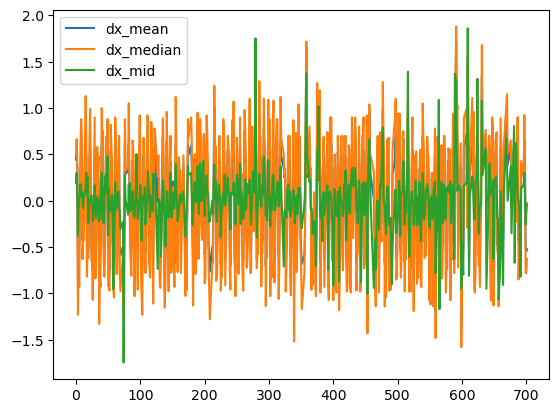

In [98]:
## Splitting according to prefix
## Then plotting
## Then comparing means and variances

def compare_by_prefix(data, prefix):
    ## identify the cols
    cols_with_prefix = []
    for col in data.columns:
        if col.lower().startswith(prefix):
            cols_with_prefix.append(col)
    print("cols_with_prefix")
    print(cols_with_prefix)
    print()
    
    ## combine into a dataframe
    df = data[cols_with_prefix]
    
    ## combine plot
    mean = []
    std = []
    for col in cols_with_prefix:
        plt.plot(data[col], label=col)
        des = data[col].describe()
        mean.append(des["mean"])
        std.append(des["std"])
    plt.legend()
    
    df_sum = pd.DataFrame({"col": cols_with_prefix, "mean": mean, "std": std}, index=cols_with_prefix)
    return df_sum

compare_by_prefix(deltas, "dx_m")



cols_with_prefix
['dx_mean', 'dx_median', 'dx_mid', 'dx_ransac', 'dx_fgr', 'dx_pt2pt_from_mean', 'dx_pt2pt_from_median', 'dx_pt2pt_from_mid', 'dx_pt2pt_from_ransac', 'dx_pt2pt_from_fgr', 'dx_pt2pl_from_mean', 'dx_pt2pl_from_median', 'dx_pt2pl_from_mid', 'dx_pt2pl_from_ransac', 'dx_pt2pl_from_fgr']



,col,mean,std
dx_mean,dx_mean,-0.015564,0.534286
dx_median,dx_median,-0.027388,0.765711
dx_mid,dx_mid,0.001810,0.345836
dx_ransac,dx_ransac,-0.012769,0.674325
dx_fgr,dx_fgr,-0.015564,0.534286
dx_pt2pt_from_mean,dx_pt2pt_from_mean,-0.016588,0.532082
dx_pt2pt_from_median,dx_pt2pt_from_median,-0.016588,0.532082
dx_pt2pt_from_mid,dx_pt2pt_from_mid,0.001945,0.349857
dx_pt2pt_from_ransac,dx_pt2pt_from_ransac,-0.011760,0.674432
dx_pt2pt_from_fgr,dx_pt2pt_from_fgr,-0.032115,0.940924


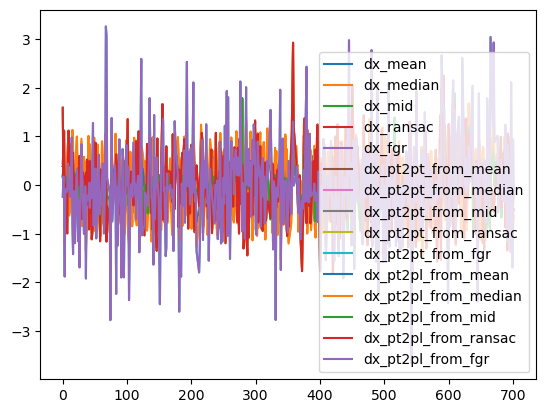

In [108]:
## Comparing the dx's
# compare_by_prefix(deltas, "dx_m")
compare_by_prefix(deltas, "dx_")

cols_with_prefix
['dy_mean', 'dy_median', 'dy_mid', 'dy_ransac', 'dy_fgr', 'dy_pt2pt_from_mean', 'dy_pt2pt_from_median', 'dy_pt2pt_from_mid', 'dy_pt2pt_from_ransac', 'dy_pt2pt_from_fgr', 'dy_pt2pl_from_mean', 'dy_pt2pl_from_median', 'dy_pt2pl_from_mid', 'dy_pt2pl_from_ransac', 'dy_pt2pl_from_fgr']



,col,mean,std
dy_mean,dy_mean,-0.031164,0.626794
dy_median,dy_median,-0.073052,1.816031
dy_mid,dy_mid,-0.009264,0.268592
dy_ransac,dy_ransac,0.078426,0.921551
dy_fgr,dy_fgr,-0.031164,0.626794
dy_pt2pt_from_mean,dy_pt2pt_from_mean,-0.030523,0.628535
dy_pt2pt_from_median,dy_pt2pt_from_median,-0.030523,0.628535
dy_pt2pt_from_mid,dy_pt2pt_from_mid,-0.009400,0.270854
dy_pt2pt_from_ransac,dy_pt2pt_from_ransac,0.077638,0.922723
dy_pt2pt_from_fgr,dy_pt2pt_from_fgr,0.044628,1.556385


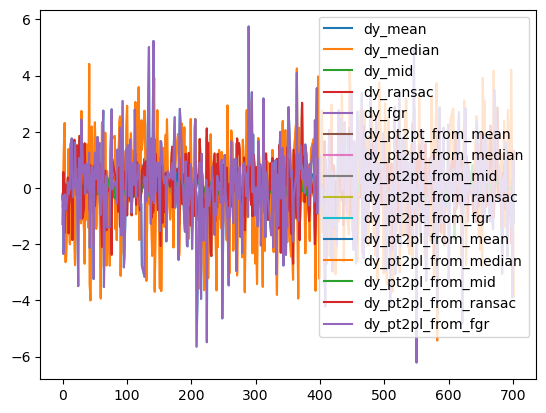

In [107]:
## Comparing the dy's
# compare_by_prefix(deltas, "dy_m")
compare_by_prefix(deltas, "dy_")

cols_with_prefix
['dz_mean', 'dz_median', 'dz_mid', 'dz_ransac', 'dz_fgr', 'dz_pt2pt_from_mean', 'dz_pt2pt_from_median', 'dz_pt2pt_from_mid', 'dz_pt2pt_from_ransac', 'dz_pt2pt_from_fgr', 'dz_pt2pl_from_mean', 'dz_pt2pl_from_median', 'dz_pt2pl_from_mid', 'dz_pt2pl_from_ransac', 'dz_pt2pl_from_fgr']



,col,mean,std
dz_mean,dz_mean,0.0,0.0
dz_median,dz_median,0.0,0.0
dz_mid,dz_mid,0.0,0.0
dz_ransac,dz_ransac,0.0,0.0
dz_fgr,dz_fgr,0.0,0.0
dz_pt2pt_from_mean,dz_pt2pt_from_mean,0.0,0.0
dz_pt2pt_from_median,dz_pt2pt_from_median,0.0,0.0
dz_pt2pt_from_mid,dz_pt2pt_from_mid,0.0,0.0
dz_pt2pt_from_ransac,dz_pt2pt_from_ransac,0.0,0.0
dz_pt2pt_from_fgr,dz_pt2pt_from_fgr,0.0,0.0


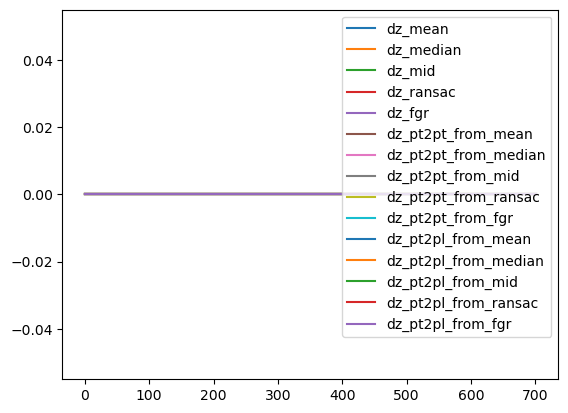

In [106]:
## Comparing the dz's
# compare_by_prefix(deltas, "dz_m")
compare_by_prefix(deltas, "dz_")

cols_with_prefix
['dtheta_mean', 'dtheta_median', 'dtheta_mid', 'dtheta_ransac', 'dtheta_fgr', 'dtheta_pt2pt_from_mean', 'dtheta_pt2pt_from_median', 'dtheta_pt2pt_from_mid', 'dtheta_pt2pt_from_ransac', 'dtheta_pt2pt_from_fgr', 'dtheta_pt2pl_from_mean', 'dtheta_pt2pl_from_median', 'dtheta_pt2pl_from_mid', 'dtheta_pt2pl_from_ransac', 'dtheta_pt2pl_from_fgr']



,col,mean,std
dtheta_mean,dtheta_mean,0.000000,0.000000
dtheta_median,dtheta_median,0.000000,0.000000
dtheta_mid,dtheta_mid,0.000000,0.000000
dtheta_ransac,dtheta_ransac,-0.185357,0.545970
dtheta_fgr,dtheta_fgr,0.000000,0.000000
dtheta_pt2pt_from_mean,dtheta_pt2pt_from_mean,-0.001417,0.002177
dtheta_pt2pt_from_median,dtheta_pt2pt_from_median,-0.001417,0.002177
dtheta_pt2pt_from_mid,dtheta_pt2pt_from_mid,-0.001461,0.002534
dtheta_pt2pt_from_ransac,dtheta_pt2pt_from_ransac,-0.185088,0.546216
dtheta_pt2pt_from_fgr,dtheta_pt2pt_from_fgr,-0.997126,1.264338


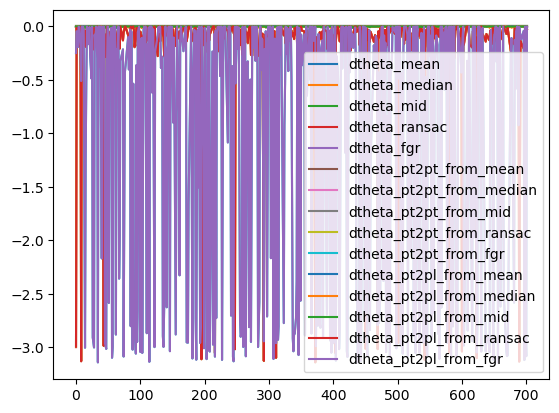

In [105]:
## Comparing the dtheta's
# compare_by_prefix(deltas, "dtheta_m")
compare_by_prefix(deltas, "dtheta_")

cols_with_prefix
['dist_mean', 'dist_median', 'dist_mid', 'dist_ransac', 'dist_fgr', 'dist_pt2pt_from_mean', 'dist_pt2pt_from_median', 'dist_pt2pt_from_mid', 'dist_pt2pt_from_ransac', 'dist_pt2pt_from_fgr', 'dist_pt2pl_from_mean', 'dist_pt2pl_from_median', 'dist_pt2pl_from_mid', 'dist_pt2pl_from_ransac', 'dist_pt2pl_from_fgr']



,col,mean,std
dist_mean,dist_mean,0.748447,0.343964
dist_median,dist_median,1.744746,0.916770
dist_mid,dist_mid,0.307211,0.311890
dist_ransac,dist_ransac,1.000040,0.555264
dist_fgr,dist_fgr,0.748447,0.343964
dist_pt2pt_from_mean,dist_pt2pt_from_mean,0.747025,0.346802
dist_pt2pt_from_median,dist_pt2pt_from_median,0.747025,0.346802
dist_pt2pt_from_mid,dist_pt2pt_from_mid,0.312020,0.313548
dist_pt2pt_from_ransac,dist_pt2pt_from_ransac,1.000935,0.555592
dist_pt2pt_from_fgr,dist_pt2pt_from_fgr,1.449021,1.098661


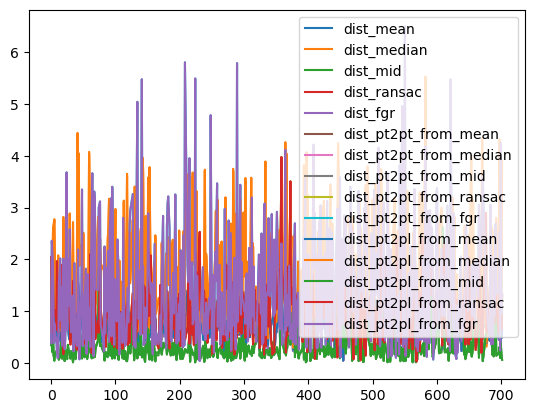

In [104]:
## Comparing the dist's
# compare_by_prefix(deltas, "dist_m")
compare_by_prefix(deltas, "dist_")

In [ ]:
## TAKEAWAYS
## [Again] No evidence of the ICPs working
## Mid is the closest approximation to the labels 
    ## Could possibly finetune the mid calculation 
        ## to remove fringe outliers and 
        ## to mandate an appropriate window/spread and impose an offset